### Loading Libraries and Data

In [2]:
%tensorflow_version 2.x
from numpy.random import seed
seed(2)
#from tensorflow import set_random_seed
#set_random_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
#from missingpy import MissForest
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

2.3.0


In [3]:
from google.colab import files
uploaded= files.upload()
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.4f}'.format

Online_appoint = pd.read_excel("OnlineUse.xlsx",'OnlineUseData')



Online_appoint

Saving OnlineUse.xlsx to OnlineUse.xlsx


,ClinicID,OnlineAppointmentUse,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor,numpats
0,1,0.0597,0.4785,0.1083,0.0587,0.1818,0.0992,0.1825,0.1430,0.1547,0.1205,0.0597,0.4655,0.7673,0.8247,0.5260,0.8208,0.6516,0.5347,0.1809,TPP,4088
1,2,0.1338,0.4745,0.1062,0.1468,0.1393,0.0729,0.2185,0.1657,0.1399,0.0717,0.0451,0.7172,0.9420,0.9565,0.5713,0.7960,0.6967,0.7239,0.2978,TPP,19599
2,3,0.0610,0.4045,0.0364,0.0670,0.1258,0.1952,0.1705,0.1817,0.1409,0.0955,0.0233,0.8579,0.9768,0.9225,0.4262,0.9553,0.6520,0.5634,0.2313,TPP,10606
3,4,0.0990,0.3981,0.0210,0.1016,0.0740,0.2052,0.1438,0.1325,0.2006,0.0982,0.0440,0.6888,0.9419,0.9756,0.4972,0.9128,0.5157,0.5682,0.5476,TPP,8047
4,5,0.0998,0.4675,0.0345,0.1080,0.1818,0.1142,0.1202,0.2306,0.1275,0.0894,0.0283,0.6822,0.8482,0.9213,0.6443,0.8621,0.5990,0.5358,0.4056,TPP,14585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6852,6858,0.1470,0.4372,0.0126,0.0997,0.1584,0.2314,0.1791,0.1352,0.0967,0.0666,0.0329,0.8327,0.7383,0.9272,0.6447,0.7543,0.6988,0.4780,0.4295,TPP,6215
6853,6859,0.1291,0.5170,0.0741,0.1017,0.1393,0.2065,0.1590,0.2016,0.1005,0.0726,0.0187,0.4563,0.6130,0.8170,0.5522,0.7546,0.8028,0.2355,0.4360,TPP,6032
6854,6860,-97.0000,-97.0000,-97.0000,-97.0000,-97.0000,-97.0000,-97.0000,-97.0000,-97.0000,-97.0000,-97.0000,-97.0000,-97.0000,-97.0000,-97.0000,-97.0000,-97.0000,-97.0000,-97.0000,EMIS,135
6855,6861,0.1420,0.6017,0.2127,0.2118,0.2063,0.3310,0.1857,0.0592,0.0059,0.0000,0.0000,0.4118,0.4815,0.0641,0.3335,0.3889,0.9083,0.2268,0.3620,EMIS,5549


In [4]:
pd.options.display.max_rows = 30
Online_appoint.isnull().sum()

ClinicID                0
OnlineAppointmentUse    0
malepct                 0
unemp                   0
age16to24               0
age25to34               0
age35to44               0
age45to54               0
age55to64               0
age65to74               0
age75to84               0
age85plus               0
phoneeasy               0
onlineasy               0
race                    0
longstdhealth           0
canmngownhealth         0
reducedability          0
prefgpalways            0
bcaaware                0
vendor                  0
numpats                 0
dtype: int64

### Preprocessing Data

In [31]:
Online_appoint.query([Online_appoint.columns]<1)
Online_appoint.columns

Index(['ClinicID', 'OnlineAppointmentUse', 'malepct', 'unemp', 'age16to24',
       'age25to34', 'age35to44', 'age45to54', 'age55to64', 'age65to74',
       'age75to84', 'age85plus', 'phoneeasy', 'onlineasy', 'race',
       'longstdhealth', 'canmngownhealth', 'reducedability', 'prefgpalways',
       'bcaaware', 'vendor', 'numpats'],
      dtype='object')

In [5]:
Online_appoint.describe()

,ClinicID,OnlineAppointmentUse,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,numpats
count,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000
mean,3433.9555,-0.2758,0.2808,-0.7985,-0.1072,-0.0472,-0.0461,-0.0349,-0.0544,-0.1152,-0.5397,-2.1991,0.5054,0.5561,0.4994,0.2947,-0.6971,-0.9105,-2.8189,0.1816,8602.8997
std,1979.6661,6.3362,4.5556,9.0294,4.5375,4.5405,4.5404,4.5407,4.5398,4.8365,7.7152,14.6036,4.5698,4.5698,4.8740,4.7065,12.1261,12.0418,17.6659,4.7060,5505.2618
min,1.0000,-98.0000,-97.0000,-98.0000,-97.0000,-97.0000,-97.0000,-97.0000,-97.0000,-98.0000,-98.0000,-98.0000,-97.0000,-97.0000,-98.0000,-97.0000,-97.0000,-97.0000,-97.0000,-98.0000,52.0000
25%,1720.0000,0.0713,0.4560,0.0131,0.0677,0.1109,0.1223,0.1494,0.1306,0.0933,0.0493,0.0165,0.5875,0.6961,0.6026,0.4663,0.7774,0.5263,0.3412,0.2924,4789.0000
50%,3434.0000,0.1214,0.4918,0.0315,0.0974,0.1548,0.1596,0.1772,0.1605,0.1266,0.0726,0.0265,0.7475,0.7865,0.8572,0.5268,0.8390,0.5941,0.4761,0.4086,7561.0000
75%,5148.0000,0.1855,0.5286,0.0606,0.1309,0.2069,0.2043,0.2046,0.1863,0.1585,0.0946,0.0383,0.8756,0.8597,0.9415,0.5816,0.8901,0.6635,0.6186,0.5236,11106.0000
max,6862.0000,0.6674,0.8427,0.5951,0.9073,0.6937,0.4442,0.3514,0.3203,0.3095,0.2333,0.5815,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9802,0.9586,73488.0000


In [6]:
# making all the values positive
Online_appoint['OnlineAppointmentUse']=np.absolute(Online_appoint['OnlineAppointmentUse'])
Online_appoint['malepct']=np.absolute(Online_appoint['malepct'])
Online_appoint['unemp']=np.absolute(Online_appoint['unemp'])
Online_appoint['age16to24']=np.absolute(Online_appoint['age16to24'])
Online_appoint['age25to34']=np.absolute(Online_appoint['age25to34'])
Online_appoint['age35to44']=np.absolute(Online_appoint['age35to44'])
Online_appoint['age45to54']=np.absolute(Online_appoint['age45to54'])
Online_appoint['age55to64']=np.absolute(Online_appoint['age55to64'])
Online_appoint['age65to74']=np.absolute(Online_appoint['age65to74'])
Online_appoint['age75to84']=np.absolute(Online_appoint['age75to84'])
Online_appoint['age85plus']=np.absolute(Online_appoint['age85plus'])
Online_appoint['phoneeasy']=np.absolute(Online_appoint['phoneeasy'])
Online_appoint['onlineasy']=np.absolute(Online_appoint['onlineasy'])
Online_appoint['canmngownhealth']=np.absolute(Online_appoint['canmngownhealth'])
Online_appoint['race']=np.absolute(Online_appoint['race'])
Online_appoint['longstdhealth']=np.absolute(Online_appoint['longstdhealth'])
Online_appoint['reducedability']=np.absolute(Online_appoint['reducedability'])
Online_appoint['prefgpalways']=np.absolute(Online_appoint['prefgpalways'])
Online_appoint['bcaaware']=np.absolute(Online_appoint['bcaaware'])


Online_appoint.describe()

,ClinicID,OnlineAppointmentUse,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,numpats
count,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000
mean,3433.9555,0.5488,0.7052,0.8830,0.3172,0.3772,0.3783,0.3895,0.3700,0.3664,0.6851,2.2556,0.9298,0.9805,0.9810,0.7474,2.3302,2.0885,3.7732,0.6346,8602.8997
std,1979.6661,6.3184,4.5095,9.0216,4.5277,4.5251,4.5248,4.5241,4.5250,4.8240,7.7036,14.5950,4.5026,4.4979,4.8003,4.6561,11.9205,11.8942,17.4870,4.6665,5505.2618
min,1.0000,0.0000,0.2478,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0615,0.0000,0.0000,0.1591,0.2031,0.2624,0.0214,0.0052,52.0000
25%,1720.0000,0.0720,0.4564,0.0137,0.0678,0.1113,0.1226,0.1497,0.1310,0.0937,0.0500,0.0175,0.5893,0.6972,0.6045,0.4670,0.7829,0.5319,0.3628,0.2931,4789.0000
50%,3434.0000,0.1222,0.4922,0.0324,0.0976,0.1551,0.1598,0.1774,0.1608,0.1268,0.0732,0.0275,0.7485,0.7869,0.8585,0.5271,0.8425,0.5990,0.4920,0.4097,7561.0000
75%,5148.0000,0.1866,0.5289,0.0619,0.1313,0.2073,0.2047,0.2051,0.1866,0.1588,0.0952,0.0396,0.8767,0.8604,0.9423,0.5820,0.8934,0.6677,0.6438,0.5254,11106.0000
max,6862.0000,98.0000,97.0000,98.0000,97.0000,97.0000,97.0000,97.0000,97.0000,98.0000,98.0000,98.0000,97.0000,97.0000,98.0000,97.0000,97.0000,97.0000,97.0000,98.0000,73488.0000


In [7]:
Ohe=OneHotEncoder(sparse=False)
Online_appoint_vendor=pd.DataFrame(Ohe.fit_transform(Online_appoint[['vendor']]))
Online_appoint_vendor.rename(columns={0:'EMIS',1:'EMIS (I)',2:'MICROTEST',3:'TPP',4:'VISION',5:'VISION (I)'},inplace=True)
Online_appoint_vendor

,EMIS,EMIS (I),MICROTEST,TPP,VISION,VISION (I)
0,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
...,...,...,...,...,...,...
6852,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
6853,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
6854,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6855,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [8]:
# seperating the numpats columns
Online_appoint_numpats=Online_appoint['numpats']

In [9]:
Online_appoint.drop(columns=['vendor','numpats'],axis=1,inplace=True)

In [10]:
Online_appoint_final=Online_appoint.join(Online_appoint_vendor)
Online_appoint_final

,ClinicID,OnlineAppointmentUse,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,EMIS,EMIS (I),MICROTEST,TPP,VISION,VISION (I)
0,1,0.0597,0.4785,0.1083,0.0587,0.1818,0.0992,0.1825,0.1430,0.1547,0.1205,0.0597,0.4655,0.7673,0.8247,0.5260,0.8208,0.6516,0.5347,0.1809,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,2,0.1338,0.4745,0.1062,0.1468,0.1393,0.0729,0.2185,0.1657,0.1399,0.0717,0.0451,0.7172,0.9420,0.9565,0.5713,0.7960,0.6967,0.7239,0.2978,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
2,3,0.0610,0.4045,0.0364,0.0670,0.1258,0.1952,0.1705,0.1817,0.1409,0.0955,0.0233,0.8579,0.9768,0.9225,0.4262,0.9553,0.6520,0.5634,0.2313,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,4,0.0990,0.3981,0.0210,0.1016,0.0740,0.2052,0.1438,0.1325,0.2006,0.0982,0.0440,0.6888,0.9419,0.9756,0.4972,0.9128,0.5157,0.5682,0.5476,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,5,0.0998,0.4675,0.0345,0.1080,0.1818,0.1142,0.1202,0.2306,0.1275,0.0894,0.0283,0.6822,0.8482,0.9213,0.6443,0.8621,0.5990,0.5358,0.4056,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6852,6858,0.1470,0.4372,0.0126,0.0997,0.1584,0.2314,0.1791,0.1352,0.0967,0.0666,0.0329,0.8327,0.7383,0.9272,0.6447,0.7543,0.6988,0.4780,0.4295,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
6853,6859,0.1291,0.5170,0.0741,0.1017,0.1393,0.2065,0.1590,0.2016,0.1005,0.0726,0.0187,0.4563,0.6130,0.8170,0.5522,0.7546,0.8028,0.2355,0.4360,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
6854,6860,97.0000,97.0000,97.0000,97.0000,97.0000,97.0000,97.0000,97.0000,97.0000,97.0000,97.0000,97.0000,97.0000,97.0000,97.0000,97.0000,97.0000,97.0000,97.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6855,6861,0.1420,0.6017,0.2127,0.2118,0.2063,0.3310,0.1857,0.0592,0.0059,0.0000,0.0000,0.4118,0.4815,0.0641,0.3335,0.3889,0.9083,0.2268,0.3620,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [11]:
# removing anamolies
for x in Online_appoint_final.columns:
  for y in Online_appoint_final[x]:
    if int(y)>1:
      Online_appoint_final[x].replace([y, y/100],inplace=True)

In [12]:
finale_df=Online_appoint_final.join(Online_appoint_numpats)

In [13]:
finale_df.drop(columns='ClinicID',axis=1,inplace=True)
finale_df

,OnlineAppointmentUse,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,EMIS,EMIS (I),MICROTEST,TPP,VISION,VISION (I),numpats
0,0.0597,0.4785,0.1083,0.0587,0.1818,0.0992,0.1825,0.1430,0.1547,0.1205,0.0597,0.4655,0.7673,0.8247,0.5260,0.8208,0.6516,0.5347,0.1809,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,4088
1,0.1338,0.4745,0.1062,0.1468,0.1393,0.0729,0.2185,0.1657,0.1399,0.0717,0.0451,0.7172,0.9420,0.9565,0.5713,0.7960,0.6967,0.7239,0.2978,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,19599
2,0.0610,0.4045,0.0364,0.0670,0.1258,0.1952,0.1705,0.1817,0.1409,0.0955,0.0233,0.8579,0.9768,0.9225,0.4262,0.9553,0.6520,0.5634,0.2313,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,10606
3,0.0990,0.3981,0.0210,0.1016,0.0740,0.2052,0.1438,0.1325,0.2006,0.0982,0.0440,0.6888,0.9419,0.9756,0.4972,0.9128,0.5157,0.5682,0.5476,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,8047
4,0.0998,0.4675,0.0345,0.1080,0.1818,0.1142,0.1202,0.2306,0.1275,0.0894,0.0283,0.6822,0.8482,0.9213,0.6443,0.8621,0.5990,0.5358,0.4056,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,14585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6852,0.1470,0.4372,0.0126,0.0997,0.1584,0.2314,0.1791,0.1352,0.0967,0.0666,0.0329,0.8327,0.7383,0.9272,0.6447,0.7543,0.6988,0.4780,0.4295,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,6215
6853,0.1291,0.5170,0.0741,0.1017,0.1393,0.2065,0.1590,0.2016,0.1005,0.0726,0.0187,0.4563,0.6130,0.8170,0.5522,0.7546,0.8028,0.2355,0.4360,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,6032
6854,0.1291,0.5170,0.0741,0.1017,0.1393,0.2065,0.1590,0.2016,0.1005,0.0726,0.0187,0.4563,0.6130,0.8170,0.5522,0.7546,0.8028,0.2355,0.4360,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,135
6855,0.1420,0.6017,0.2127,0.2118,0.2063,0.3310,0.1857,0.0592,0.0059,0.0000,0.0000,0.4118,0.4815,0.0641,0.3335,0.3889,0.9083,0.2268,0.3620,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5549


In [14]:
df_target=finale_df['OnlineAppointmentUse']
df_target

0      0.0597
1      0.1338
2      0.0610
3      0.0990
4      0.0998
        ...  
6852   0.1470
6853   0.1291
6854   0.1291
6855   0.1420
6856   0.0111
Name: OnlineAppointmentUse, Length: 6857, dtype: float64

In [15]:
df_features=finale_df.drop(columns='OnlineAppointmentUse',axis=1)
df_features


,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,EMIS,EMIS (I),MICROTEST,TPP,VISION,VISION (I),numpats
0,0.4785,0.1083,0.0587,0.1818,0.0992,0.1825,0.1430,0.1547,0.1205,0.0597,0.4655,0.7673,0.8247,0.5260,0.8208,0.6516,0.5347,0.1809,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,4088
1,0.4745,0.1062,0.1468,0.1393,0.0729,0.2185,0.1657,0.1399,0.0717,0.0451,0.7172,0.9420,0.9565,0.5713,0.7960,0.6967,0.7239,0.2978,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,19599
2,0.4045,0.0364,0.0670,0.1258,0.1952,0.1705,0.1817,0.1409,0.0955,0.0233,0.8579,0.9768,0.9225,0.4262,0.9553,0.6520,0.5634,0.2313,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,10606
3,0.3981,0.0210,0.1016,0.0740,0.2052,0.1438,0.1325,0.2006,0.0982,0.0440,0.6888,0.9419,0.9756,0.4972,0.9128,0.5157,0.5682,0.5476,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,8047
4,0.4675,0.0345,0.1080,0.1818,0.1142,0.1202,0.2306,0.1275,0.0894,0.0283,0.6822,0.8482,0.9213,0.6443,0.8621,0.5990,0.5358,0.4056,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,14585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6852,0.4372,0.0126,0.0997,0.1584,0.2314,0.1791,0.1352,0.0967,0.0666,0.0329,0.8327,0.7383,0.9272,0.6447,0.7543,0.6988,0.4780,0.4295,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,6215
6853,0.5170,0.0741,0.1017,0.1393,0.2065,0.1590,0.2016,0.1005,0.0726,0.0187,0.4563,0.6130,0.8170,0.5522,0.7546,0.8028,0.2355,0.4360,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,6032
6854,0.5170,0.0741,0.1017,0.1393,0.2065,0.1590,0.2016,0.1005,0.0726,0.0187,0.4563,0.6130,0.8170,0.5522,0.7546,0.8028,0.2355,0.4360,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,135
6855,0.6017,0.2127,0.2118,0.2063,0.3310,0.1857,0.0592,0.0059,0.0000,0.0000,0.4118,0.4815,0.0641,0.3335,0.3889,0.9083,0.2268,0.3620,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5549


In [16]:
df_features.describe()

,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,EMIS,EMIS (I),MICROTEST,TPP,VISION,VISION (I),numpats
count,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000,6857.0000
mean,0.4940,0.0426,0.1052,0.1655,0.1665,0.1777,0.1581,0.1259,0.0730,0.0288,0.7192,0.7700,0.7417,0.5222,0.8292,0.5984,0.4958,0.4091,0.5762,0.0074,0.0064,0.3675,0.0420,0.0004,8602.8997
std,0.0580,0.0409,0.0604,0.0765,0.0614,0.0432,0.0441,0.0482,0.0330,0.0176,0.1917,0.1238,0.2623,0.0868,0.0837,0.0972,0.1866,0.1618,0.4942,0.0859,0.0799,0.4822,0.2006,0.0209,5505.2618
min,0.2478,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0615,0.0000,0.0000,0.1591,0.2031,0.2624,0.0214,0.0052,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,52.0000
25%,0.4563,0.0136,0.0678,0.1113,0.1225,0.1496,0.1309,0.0935,0.0496,0.0170,0.5886,0.6969,0.6037,0.4667,0.7809,0.5309,0.3590,0.2928,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4789.0000
50%,0.4920,0.0319,0.0975,0.1550,0.1597,0.1772,0.1606,0.1267,0.0727,0.0269,0.7480,0.7867,0.8577,0.5268,0.8404,0.5969,0.4855,0.4092,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7561.0000
75%,0.5286,0.0609,0.1310,0.2071,0.2045,0.2047,0.1864,0.1585,0.0947,0.0385,0.8760,0.8599,0.9417,0.5816,0.8904,0.6646,0.6276,0.5243,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,11106.0000
max,0.8427,0.5951,0.9073,0.6937,0.4442,0.3514,0.3203,0.3095,0.2333,0.5815,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9802,0.9586,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,73488.0000


In [17]:
# Splitiing the data
train_x,valid_x,train_y,valid_y=train_test_split(df_features,df_target,test_size=0.4,random_state=1)
print('train x shape :', train_x.shape)
print('train y shape :', train_y.shape)
print('valid x shape :', valid_x.shape)
print('valid y shape :', valid_y.shape)

train x shape : (4114, 25)
train y shape : (4114,)
valid x shape : (2743, 25)
valid y shape : (2743,)


In [18]:
# Standardizing the data
scaler = StandardScaler().fit(train_x.values)
scaledf = scaler.transform(train_x.values)
train_x = pd.DataFrame(scaledf, index=train_x.index, columns=train_x.columns)


scaler2 = StandardScaler().fit(valid_x.values)
vscaled = scaler2.transform(valid_x.values)
valid_x = pd.DataFrame(vscaled, index=valid_x.index, columns=valid_x.columns)

In [19]:
print('Training sample summary')
display.display(train_x.describe())
print('Valid sample summary')
display.display(valid_x.describe())

Training sample summary


,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,EMIS,EMIS (I),MICROTEST,TPP,VISION,VISION (I),numpats
count,4114.0000,4114.0000,4114.0000,4114.0000,4114.0000,4114.0000,4114.0000,4114.0000,4114.0000,4114.0000,4114.0000,4114.0000,4114.0000,4114.0000,4114.0000,4114.0000,4114.0000,4114.0000,4114.0000,4114.0000,4114.0000,4114.0000,4114.0000,4114.0000,4114.0000
mean,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000
std,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001
min,-4.2183,-1.0090,-1.7347,-2.1335,-2.7345,-4.0969,-3.5833,-2.5913,-2.1995,-1.5462,-3.2164,-6.2258,-2.8214,-4.1702,-7.3560,-3.1134,-2.5484,-2.4538,-1.1815,-0.0843,-0.0828,-0.7539,-0.2063,-0.0156,-1.5847
25%,-0.6646,-0.6871,-0.6102,-0.7136,-0.7160,-0.6486,-0.6080,-0.6658,-0.7071,-0.6356,-0.6687,-0.5897,-0.5126,-0.6346,-0.5534,-0.7045,-0.7251,-0.7198,-1.1815,-0.0843,-0.0828,-0.7539,-0.2063,-0.0156,-0.6946
50%,-0.0387,-0.2603,-0.1298,-0.1442,-0.1164,-0.0040,0.0627,0.0218,0.0021,-0.1058,0.1504,0.1268,0.4386,0.0495,0.1360,-0.0237,-0.0541,0.0015,0.8464,-0.0843,-0.0828,-0.7539,-0.2063,-0.0156,-0.1911
75%,0.5919,0.4208,0.4212,0.5398,0.6308,0.6254,0.6381,0.6752,0.6606,0.5240,0.8126,0.7300,0.7589,0.6786,0.7315,0.6756,0.6982,0.7176,0.8464,-0.0843,-0.0828,1.3264,-0.2063,-0.0156,0.4706
max,5.9848,12.9647,13.0894,6.8490,4.5458,4.0124,3.6854,3.7869,4.8306,29.8189,1.4654,1.8504,0.9779,5.4863,2.0249,4.0823,2.5768,2.9102,0.8464,11.8685,12.0801,1.3264,4.8465,64.1327,9.6764


Valid sample summary


,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,EMIS,EMIS (I),MICROTEST,TPP,VISION,VISION (I),numpats
count,2743.0000,2743.0000,2743.0000,2743.0000,2743.0000,2743.0000,2743.0000,2743.0000,2743.0000,2743.0000,2743.0000,2743.0000,2743.0000,2743.0000,2743.0000,2743.0000,2743.0000,2743.0000,2743.0000,2743.0000,2743.0000,2743.0000,2743.0000,2743.0000,2743.0000
mean,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000
std,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002,1.0002
min,-3.4497,-1.0952,-1.7579,-2.0377,-2.6858,-4.1297,-3.5877,-2.6397,-2.2357,-1.7808,-3.4480,-6.2129,-2.8153,-3.8895,-4.7009,-3.5253,-2.4592,-2.5109,-1.1432,-0.0899,-0.0766,-0.7748,-0.2139,-0.0270,-1.4715
25%,-0.6248,-0.7425,-0.6245,-0.6904,-0.7118,-0.6475,-0.6316,-0.6770,-0.7118,-0.7079,-0.6933,-0.6056,-0.5432,-0.6554,-0.6159,-0.6747,-0.7393,-0.7133,-1.1432,-0.0899,-0.0766,-0.7748,-0.2139,-0.0270,-0.6917
50%,-0.0285,-0.2632,-0.1391,-0.1222,-0.1027,-0.0180,0.0477,0.0080,-0.0160,-0.1025,0.1549,0.1474,0.4428,0.0596,0.1261,-0.0005,-0.0612,-0.0009,0.8747,-0.0899,-0.0766,-0.7748,-0.2139,-0.0270,-0.1865
75%,0.6082,0.4985,0.4300,0.5466,0.6026,0.6302,0.6541,0.6836,0.6504,0.6009,0.8319,0.7128,0.7672,0.6935,0.7308,0.6847,0.7182,0.6984,0.8747,-0.0899,-0.0766,1.2906,-0.2139,-0.0270,0.4357
max,4.2397,9.1829,10.6173,6.1174,4.2074,3.9852,3.5084,3.2716,3.7835,4.6007,1.4642,1.8699,0.9951,4.5458,2.0691,4.2141,2.6081,3.4222,0.8747,11.1212,13.0552,1.2906,4.6753,37.0203,11.4262


In [20]:
print('Training target sample summary')
display.display(train_y.describe())
print('Validation target sample summary')
display.display(valid_y.describe())

Training target sample summary


count   4114.0000
mean       0.1369
std        0.0875
min        0.0000
25%        0.0716
50%        0.1213
75%        0.1864
max        0.6521
Name: OnlineAppointmentUse, dtype: float64

Validation target sample summary


count   2743.0000
mean       0.1373
std        0.0884
min        0.0000
25%        0.0720
50%        0.1221
75%        0.1849
max        0.6674
Name: OnlineAppointmentUse, dtype: float64

In [1]:
!pip install -U keras-tuner

     |████████████████████████████████| 61kB 2.1MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=e44950dd200bd903f5aab0e620fbd4d5092b69377546f0583b2566587b95b978
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=34417fa3355c6aa5f27bffab59d73aec5231106df23f7f4ca51973a298fb7ab4
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


### Build Model

In [21]:
# Using keras tuner to build a model
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=8,
                                            max_value=32,
                                            step=8),
                               activation='relu'))
    model.add(layers.Dense(1))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mse',
        metrics=['mae'])
    return model


In [22]:
tuner = RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=4,
    executions_per_trial=2,
    directory='my_dir',
    project_name='Online_appointment')

### Fit Model

In [23]:
tuner.search(train_x.values, train_y.values,
             epochs=100,
             validation_data= (valid_x, valid_y))

Epoch 1/100
129/129 [==============================] - 0s 3ms/step - loss: 0.0300 - mae: 0.0849 - val_loss: 0.0223 - val_mae: 0.0610
Epoch 2/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0199 - mae: 0.0527 - val_loss: 0.0039 - val_mae: 0.0436
Epoch 3/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0032 - mae: 0.0427 - val_loss: 0.0059 - val_mae: 0.0422
Epoch 4/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0081 - mae: 0.0449 - val_loss: 0.0050 - val_mae: 0.0430
Epoch 5/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0047 - mae: 0.0430 - val_loss: 0.0031 - val_mae: 0.0428
Epoch 6/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0029 - mae: 0.0404 - val_loss: 0.0029 - val_mae: 0.0411
Epoch 7/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0028 - mae: 0.0402 - val_loss: 0.0026 - val_mae: 0.0389
Epoch 8/100
129/129 [==============================] - 0s 2ms/step - 

Epoch 1/100
129/129 [==============================] - 0s 3ms/step - loss: 0.8430 - mae: 0.6669 - val_loss: 0.7442 - val_mae: 0.6121
Epoch 2/100
129/129 [==============================] - 0s 2ms/step - loss: 0.5600 - mae: 0.5356 - val_loss: 0.5384 - val_mae: 0.5222
Epoch 3/100
129/129 [==============================] - 0s 2ms/step - loss: 0.4201 - mae: 0.4657 - val_loss: 0.4202 - val_mae: 0.4657
Epoch 4/100
129/129 [==============================] - 0s 2ms/step - loss: 0.3346 - mae: 0.4190 - val_loss: 0.3403 - val_mae: 0.4219
Epoch 5/100
129/129 [==============================] - 0s 2ms/step - loss: 0.2744 - mae: 0.3824 - val_loss: 0.2817 - val_mae: 0.3859
Epoch 6/100
129/129 [==============================] - 0s 2ms/step - loss: 0.2291 - mae: 0.3514 - val_loss: 0.2361 - val_mae: 0.3550
Epoch 7/100
129/129 [==============================] - 0s 2ms/step - loss: 0.1937 - mae: 0.3249 - val_loss: 0.2005 - val_mae: 0.3284
Epoch 8/100
129/129 [==============================] - 0s 2ms/step - 

Epoch 1/100
129/129 [==============================] - 0s 3ms/step - loss: 0.0176 - mae: 0.0811 - val_loss: 0.0079 - val_mae: 0.0664
Epoch 2/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0066 - mae: 0.0621 - val_loss: 0.0052 - val_mae: 0.0531
Epoch 3/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0042 - mae: 0.0487 - val_loss: 0.0035 - val_mae: 0.0434
Epoch 4/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0034 - mae: 0.0441 - val_loss: 0.0032 - val_mae: 0.0414
Epoch 5/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0032 - mae: 0.0430 - val_loss: 0.0034 - val_mae: 0.0438
Epoch 6/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0029 - mae: 0.0414 - val_loss: 0.0034 - val_mae: 0.0446
Epoch 7/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0029 - mae: 0.0415 - val_loss: 0.0028 - val_mae: 0.0395
Epoch 8/100
129/129 [==============================] - 0s 2ms/step - 

Epoch 1/100
129/129 [==============================] - 0s 3ms/step - loss: 0.1790 - mae: 0.2851 - val_loss: 0.0525 - val_mae: 0.1720
Epoch 2/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0398 - mae: 0.1480 - val_loss: 0.0328 - val_mae: 0.1332
Epoch 3/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0249 - mae: 0.1182 - val_loss: 0.0227 - val_mae: 0.1122
Epoch 4/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0183 - mae: 0.1010 - val_loss: 0.0210 - val_mae: 0.1010
Epoch 5/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0159 - mae: 0.0913 - val_loss: 0.0215 - val_mae: 0.0917
Epoch 6/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0203 - mae: 0.0835 - val_loss: 0.0225 - val_mae: 0.0985
Epoch 7/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0232 - mae: 0.0802 - val_loss: 0.0135 - val_mae: 0.0785
Epoch 8/100
129/129 [==============================] - 0s 2ms/step - 

INFO:tensorflow:Oracle triggered exit


In [38]:
# Choosing thr model with the best hyperparameters
best_model=tuner.get_best_models(num_models=1)

In [47]:
best_hp=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
best_hp

In [50]:
# Using the tuned model 
tuner_model = tuner.hypermodel.build(best_hp)
tune_model=tuner_model.fit(train_x, train_y, epochs = 50, validation_data = (valid_x,valid_y))

Epoch 1/50

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

129/129 [==============================] - 0s 3ms/step - loss: 0.0372 - mae: 0.1060 - val_loss: 0.0223 - val_mae: 0.0611
Epoch 2/50
129/129 [==============================] - 0s 2ms/step - loss: 0.0251 - mae: 0.0618 - val_loss: 0.0210 - val_mae: 0.0607
Epoch 3/50
129/129 [==============================] - 0s 2ms/step - loss: 0.0181 - mae: 0.0511 - val_loss: 0.0036 - val_mae: 0.0454
Epoch 4/50
129/129 [==============================] - 0s 2ms/step - loss: 0.0033 - mae: 0.0438 - val_loss: 0.003

In [ ]:
tuner_model.

In [32]:
baseline_model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu,
                       input_shape=(train_x.shape[1],)),
    keras.layers.Dense(32,activation=tf.nn.relu,),
    keras.layers.Dense(32,activation=tf.nn.relu,),
    # keras.layers.Dense(32,activation=tf.nn.relu,),

    keras.layers.Dense(1)

  ])

baseline_model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae'])
baseline_model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                832       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 2,977
Trainable params: 2,977
Non-trainable params: 0
_________________________________________________________________


In [33]:
EPOCHS = 100
model1 = baseline_model.fit(train_x, train_y, epochs=EPOCHS,
                    validation_data= (valid_x, valid_y), verbose=1)
                    # callbacks=[PrintDot(), tensorboard_callback])

Epoch 1/100
129/129 [==============================] - 0s 3ms/step - loss: 0.0263 - mae: 0.1106 - val_loss: 0.0093 - val_mae: 0.0739
Epoch 2/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0072 - mae: 0.0648 - val_loss: 0.0066 - val_mae: 0.0600
Epoch 3/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0062 - mae: 0.0574 - val_loss: 0.0056 - val_mae: 0.0546
Epoch 4/100
129/129 [==============================] - 0s 3ms/step - loss: 0.0054 - mae: 0.0532 - val_loss: 0.0047 - val_mae: 0.0512
Epoch 5/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0044 - mae: 0.0494 - val_loss: 0.0045 - val_mae: 0.0499
Epoch 6/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0042 - mae: 0.0479 - val_loss: 0.0042 - val_mae: 0.0477
Epoch 7/100
129/129 [==============================] - 0s 2ms/step - loss: 0.0038 - mae: 0.0458 - val_loss: 0.0037 - val_mae: 0.0472
Epoch 8/100
129/129 [==============================] - 0s 2ms/step - 

### Plot Results

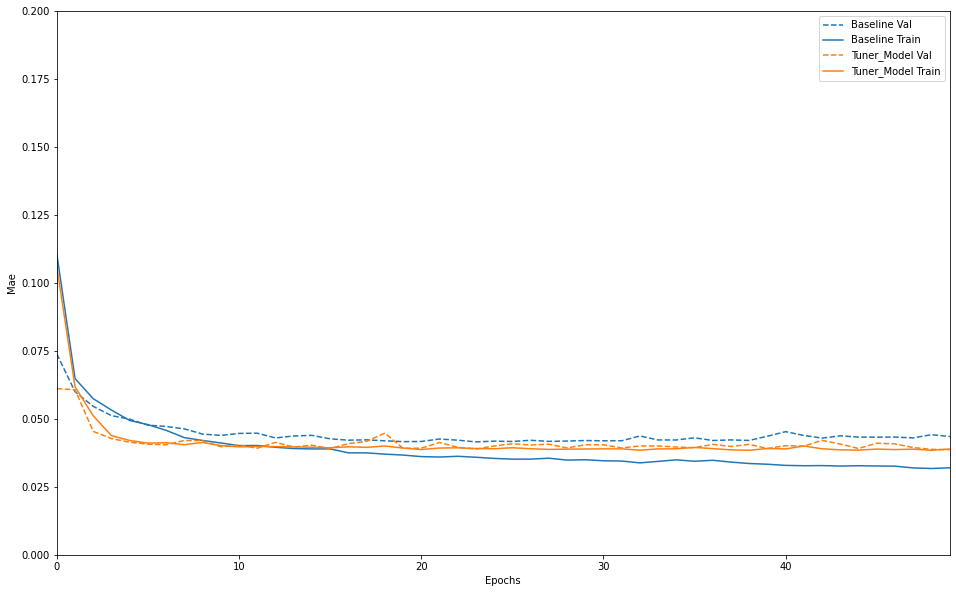

In [51]:
import matplotlib.pyplot as plt


def plot_history(histories, key='mae'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,0.2])

plot_history([('baseline', model1),('tuner_model', tune_model)])

### Explaination